# Neural Network Classification of 

In [241]:
import pandas as pd
import numpy as np
from random import randint

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler


from keras.losses import BinaryCrossentropy, BinaryFocalCrossentropy
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [242]:
data = pd.read_csv("data/magic04.csv", index_col=0)
data['class'] = data['class'].replace('g',1.0)
data['class'] = data['class'].replace('h',0.0)
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1.0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1.0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1.0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1.0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1.0


## Define Features and Class

Define the features, classes, and standardize the feature columns

In [243]:
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
classCols = ['class']
classNames = ['h', 'g']
num_features = len(featureNames)
num_outputs = len(classCols)
# for featureName in featureNames:
#     data[featureName] = (data[featureName] - data[featureName].mean()) / data[featureName].std()

# data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,-0.577211,-0.336795,-0.381120,0.062758,-0.148919,0.541028,0.224812,-0.405831,0.476803,-1.497826,1.0
1,-0.510955,-0.570012,-0.648578,0.820362,1.471737,0.516906,0.260357,-0.490081,-0.815397,0.153121,1.0
2,2.568210,6.205695,2.615714,-1.875834,-1.773194,2.044938,-1.478497,-2.182972,1.889174,0.842613,1.0
3,-0.694749,-0.687241,-1.029451,1.282035,1.606566,0.532757,-0.333506,-0.355350,-0.658786,-1.031436,1.0
4,0.516609,0.476371,0.711138,-0.347497,-0.284652,-0.020200,0.353077,1.036593,-0.881016,2.176369,1.0


### Split Data into Training and Testing

In [ ]:
# Get X and y into tensorflow friendly format
X = data[featureNames].values
y = data[classCols].values
# Split
trainX, testX, trainY, testY = train_test_split(X,y)

Standardize:

In [ ]:
scaler = StandardScaler()

# Fit only to the training data - computes the mean and standard deviations
scaler.fit(trainX)

# Now apply the transformations to the data:
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)

## Define Neural Network Models

In [244]:
# Model A: Relatively small, 3 hidden layers
modelA = Sequential()
# Input Layer
modelA.add(Dense(num_features, input_dim=num_features))
# Hidden Layers
modelA.add(Dense(num_features*3))
modelA.add(Dense(num_features*6))
modelA.add(Dense(num_features*3))
# Output Layer
modelA.add(Dense(num_outputs, activation='sigmoid'))

# Model B: Add more hidden layers, more nodes per layer
modelB = Sequential()
# Input Layer
modelB.add(Dense(num_features, input_dim=num_features))
# Hidden Layers
modelB.add(Dense(num_features*5))
modelB.add(Dense(num_features*10))
modelB.add(Dense(num_features*30))
modelB.add(Dense(num_features*10))
modelB.add(Dense(num_features*5))
modelB.add(Dense(num_features))
# Output Layer
modelB.add(Dense(num_outputs, activation='sigmoid'))

# Model C: Many hidden layers, random number of nodes between num_features and 2*num_features
modelC = Sequential()
# Input Layer
modelC.add(Dense(num_features, input_dim=num_features))
# Hidden Layers
for _ in range(100):
    num_nodes = randint(num_features,2*num_features)
    modelC.add(Dense(num_nodes))
# Output Layer
modelC.add(Dense(num_outputs, activation='sigmoid'))

# Compile Models
# BinaryCrossEntropy is good for binary classification
modelA.compile(
    loss=BinaryCrossentropy(),
    optimizer='adam')

modelB.compile(
    loss=BinaryCrossentropy(),
    optimizer='adam')

modelC.compile(
    loss=BinaryCrossentropy(),
    optimizer='adam')


## Train Models

In [246]:
# epochs = 100
epochs = 20

modelA.fit(
    trainX, 
    trainY,
    epochs=epochs,
    verbose=1, 
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

modelB.fit(
    trainX, 
    trainY,
    epochs=epochs,
    verbose=1, 
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

modelC.fit(
    trainX, 
    trainY,
    epochs=epochs,
    verbose=1, 
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/20


357/357 [==============================] - 2s 3ms/step - loss: 0.4676 - val_loss: 0.4559
Epoch 2/20
357/357 [==============================] - 1s 2ms/step - loss: 0.4605 - val_loss: 0.4566
Epoch 3/20
357/357 [==============================] - 0s 1ms/step - loss: 0.4580 - val_loss: 0.4570
Epoch 4/20
357/357 [==============================] - 0s 1ms/step - loss: 0.4576 - val_loss: 0.4564
Epoch 5/20
357/357 [==============================] - 1s 1ms/step - loss: 0.4579 - val_loss: 0.4569
Epoch 6/20
357/357 [==============================] - 1s 1ms/step - loss: 0.4566 - val_loss: 0.4557
Epoch 7/20
357/357 [==============================] - 0s 1ms/step - loss: 0.4575 - val_loss: 0.4560
Epoch 8/20
357/357 [==============================] - 0s 1ms/step - loss: 0.4574 - val_loss: 0.4566
Epoch 9/20
357/357 [==============================] - 0s 1ms/step - loss: 0.4559 - val_loss: 0.4583
Epoch 10/20
357/357 [==============================] - 0s 1ms/step - loss: 0.4561 - val_loss: 0.4566
Epoch 11/2

In [247]:
display(modelA.summary())
display(modelB.summary())
display(modelC.summary())

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1247 (Dense)          (None, 10)                110       
                                                                 
 dense_1248 (Dense)          (None, 30)                330       
                                                                 
 dense_1249 (Dense)          (None, 60)                1860      
                                                                 
 dense_1250 (Dense)          (None, 30)                1830      
                                                                 
 dense_1251 (Dense)          (None, 1)                 31        
                                                                 
Total params: 4161 (16.25 KB)
Trainable params: 4161 (16.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1252 (Dense)          (None, 10)                110       
                                                                 
 dense_1253 (Dense)          (None, 50)                550       
                                                                 
 dense_1254 (Dense)          (None, 100)               5100      
                                                                 
 dense_1255 (Dense)          (None, 300)               30300     
                                                                 
 dense_1256 (Dense)          (None, 100)               30100     
                                                                 
 dense_1257 (Dense)          (None, 50)                5050      
                                                                 
 dense_1258 (Dense)          (None, 10)              

None

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1260 (Dense)          (None, 10)                110       
                                                                 
 dense_1261 (Dense)          (None, 19)                209       
                                                                 
 dense_1262 (Dense)          (None, 15)                300       
                                                                 
 dense_1263 (Dense)          (None, 15)                240       
                                                                 
 dense_1264 (Dense)          (None, 19)                304       
                                                                 
 dense_1265 (Dense)          (None, 20)                400       
                                                                 
 dense_1266 (Dense)          (None, 13)              

None

## Evaluate Models

In [248]:
resultsA = modelA.evaluate(testX,testY,batch_size=128)
resultsB = modelB.evaluate(testX,testY,batch_size=128)
resultsC = modelC.evaluate(testX,testY,batch_size=128)

predA = modelA.predict(testX)
predB = modelB.predict(testX)
predC = modelC.predict(testX)

149/149 [==============================] - 1s 2ms/step


If output of neural net is >= 0.5, round to 1, else round to 0

In [249]:
for i in range(len(predA)):
    predA[i] = 1 if predA[i] >= 0.5 else 0
    predB[i] = 1 if predB[i] >= 0.5 else 0
    predC[i] = 1 if predC[i] >= 0.5 else 0


## Precision, Recall, F-Score, Support

In [250]:
metricsA = precision_recall_fscore_support(testY,predA)
metricsB = precision_recall_fscore_support(testY,predB)
metricsC = precision_recall_fscore_support(testY,predC)

display(metricsA)
display(metricsB)
display(metricsC)

(array([0.7565842 , 0.79811536]),
 array([0.57280967, 0.9016129 ]),
 array([0.6519945 , 0.84671312]),
 array([1655, 3100], dtype=int64))

(array([0.74589523, 0.79833142]),
 array([0.57643505, 0.89516129]),
 array([0.65030675, 0.8439781 ]),
 array([1655, 3100], dtype=int64))

(array([0.7082495 , 0.81648284]),
 array([0.63806647, 0.85967742]),
 array([0.67132867, 0.83752357]),
 array([1655, 3100], dtype=int64))

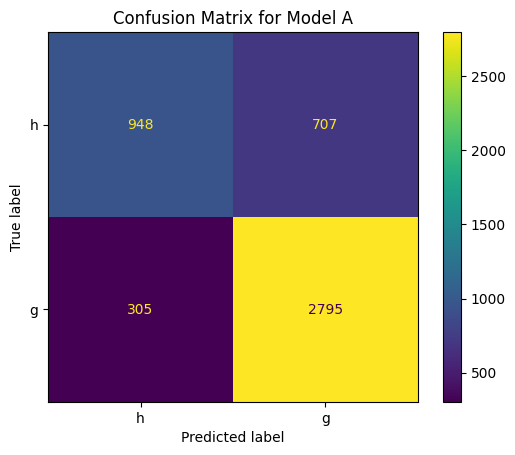

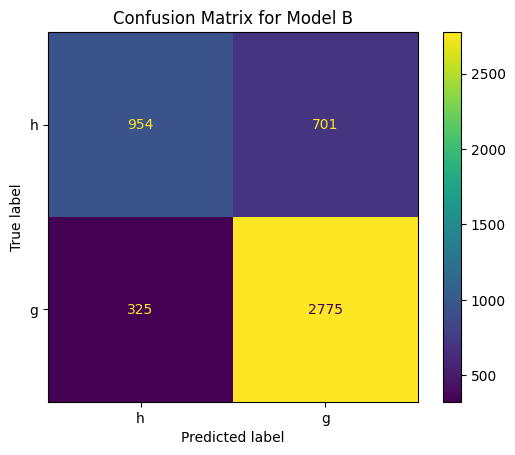

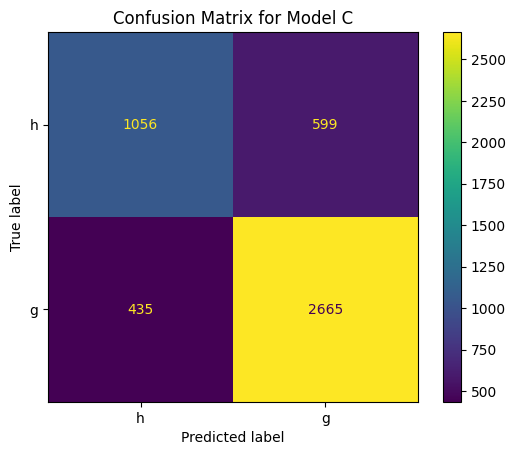

In [251]:
disp = ConfusionMatrixDisplay.from_predictions(testY,predA, display_labels=['h','g'])
disp.ax_.set_title("Confusion Matrix for Model A")
plt.show()
disp = ConfusionMatrixDisplay.from_predictions(testY,predB, display_labels=['h','g'])
disp.ax_.set_title("Confusion Matrix for Model B")
plt.show()
disp = ConfusionMatrixDisplay.from_predictions(testY,predC, display_labels=['h','g'])
disp.ax_.set_title("Confusion Matrix for Model C")
plt.show()